In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Program_4_Dataset - Program_4_Dataset.csv")

In [3]:
df.head()

,index,OS_Time_Stamp,Temperature,Pressure,Humidity,TimeStamp
0,0,1456761674,17.7,1015.2,76.4,2016-03-01 00:01:14+08:00
1,1,1456761733,17.7,1015.3,76.4,2016-03-01 00:02:13+08:00
2,2,1456761792,17.7,1015.3,76.5,2016-03-01 00:03:12+08:00
3,3,1456761853,17.7,1015.3,76.7,2016-03-01 00:04:13+08:00
4,4,1456761912,17.6,1015.2,76.8,2016-03-01 00:05:12+08:00


In [4]:
df.shape

(2878, 6)

For olynomial regression, the formula is y= b0+b1x + b2x2+ b3x3+....+ bnxn, which means we have to check for different degrees.


In [5]:
df.isnull().sum()

index            0
OS_Time_Stamp    0
Temperature      0
Pressure         0
Humidity         0
TimeStamp        0
dtype: int64

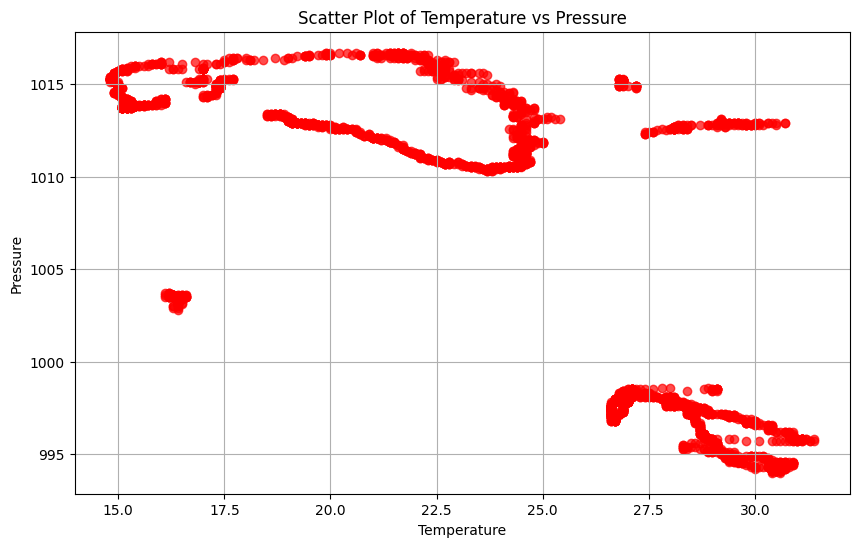

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Pressure'], color='red', alpha=0.7)
plt.title('Scatter Plot of Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.grid(True)
plt.show()


It is very clear it is not linear. it is non linear

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X=df[['Temperature']]
Y=df['Pressure']

In [9]:
Y = Y.values.reshape(-1, 1)
X= X.values.reshape(-1, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [13]:
y_pred = linear_model.predict(X_test)

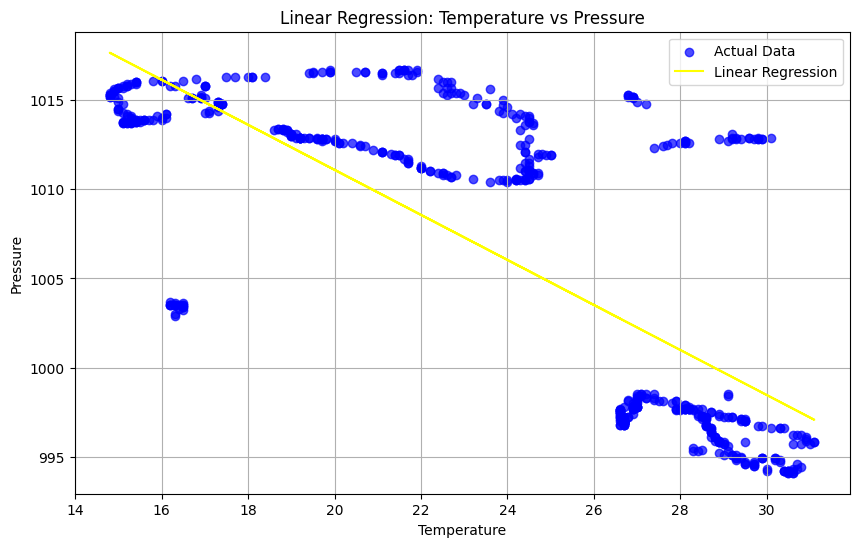

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', alpha=0.7, label='Actual Data')
plt.plot(X_test, y_pred, color='yellow', label='Linear Regression')
plt.title('Linear Regression: Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()

The linear relationship doesnt pass through all points.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
from sklearn.pipeline import make_pipeline

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Specify polynomial degrees
degrees = [1, 2, 3, 4, 5, 6]

# Loop over degrees
for degree in degrees:
    print(f"Degree: {degree}")

    # Loop over split ratios
    for split_ratio in [0.66, 0.7, 0.8]:
        # Splitting the data
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - split_ratio, random_state=42)

        # Creating polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        # Fitting a polynomial regression model
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)

        # Making predictions
        y_pred = poly_model.predict(X_test_poly)

        # Calculating metrics
        r2 = r2_score(Y_test, y_pred)
        mse = mean_squared_error(Y_test, y_pred)
        mae = mean_absolute_error(Y_test, y_pred)

        # Printing results
        print(f"  Split Ratio: {split_ratio}")
        print(f"  R2 Score: {r2}")
        print(f"  Mean Squared Error: {mse}")
        print(f"  Mean Absolute Error: {mae}")
        print("-" * 30)


Degree: 1
  Split Ratio: 0.66
  R2 Score: 0.5493235735097456
  Mean Squared Error: 31.847965820560642
  Mean Absolute Error: 4.612689935733025
------------------------------
  Split Ratio: 0.7
  R2 Score: 0.5638281875671171
  Mean Squared Error: 30.918459614710393
  Mean Absolute Error: 4.55983970067398
------------------------------
  Split Ratio: 0.8
  R2 Score: 0.5477983100026735
  Mean Squared Error: 32.10228466326592
  Mean Absolute Error: 4.585936272799693
------------------------------
Degree: 2
  Split Ratio: 0.66
  R2 Score: 0.6266694111938397
  Mean Squared Error: 26.38216497069319
  Mean Absolute Error: 3.688665149353792
------------------------------
  Split Ratio: 0.7
  R2 Score: 0.64527735998073
  Mean Squared Error: 25.14485646994188
  Mean Absolute Error: 3.622318303738564
------------------------------
  Split Ratio: 0.8
  R2 Score: 0.6263280190072713
  Mean Squared Error: 26.527376101991102
  Mean Absolute Error: 3.6628821400645486
------------------------------
Degre

Degree: 1


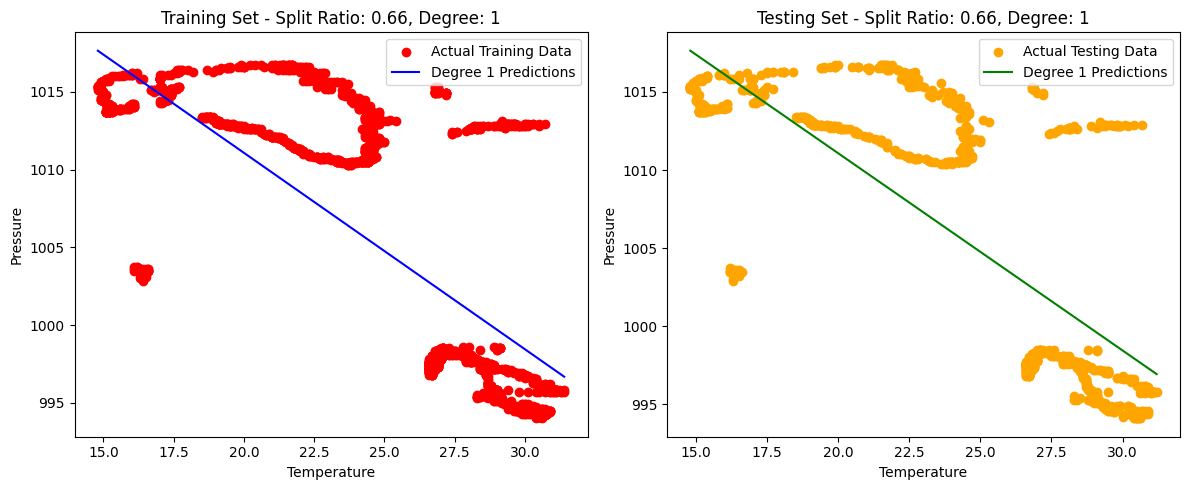

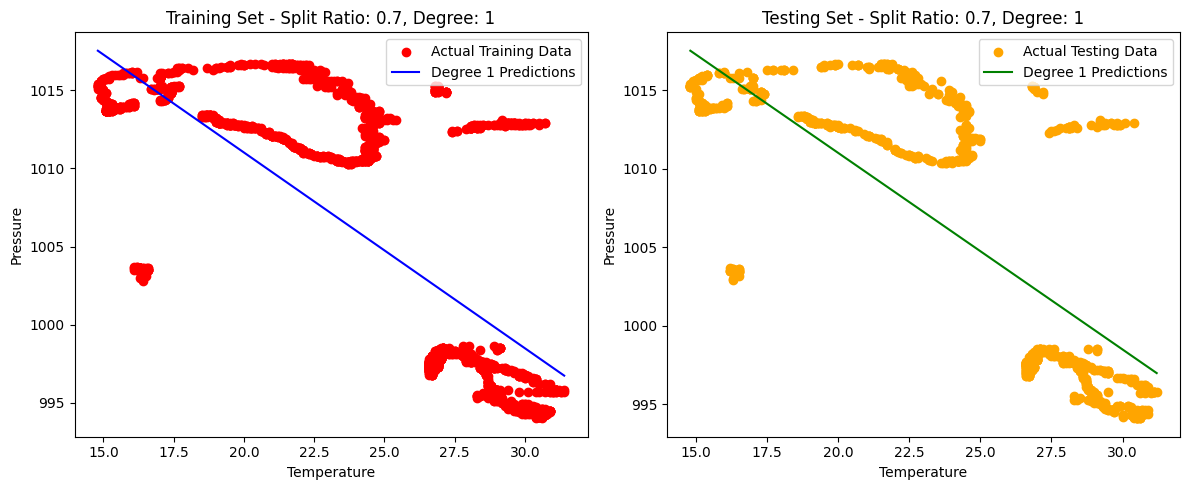

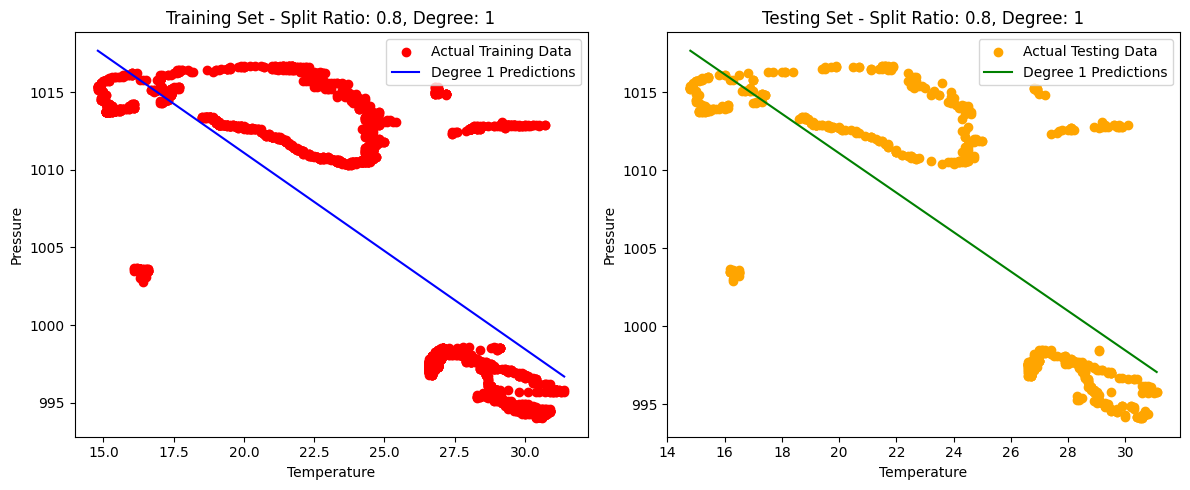

Degree: 2


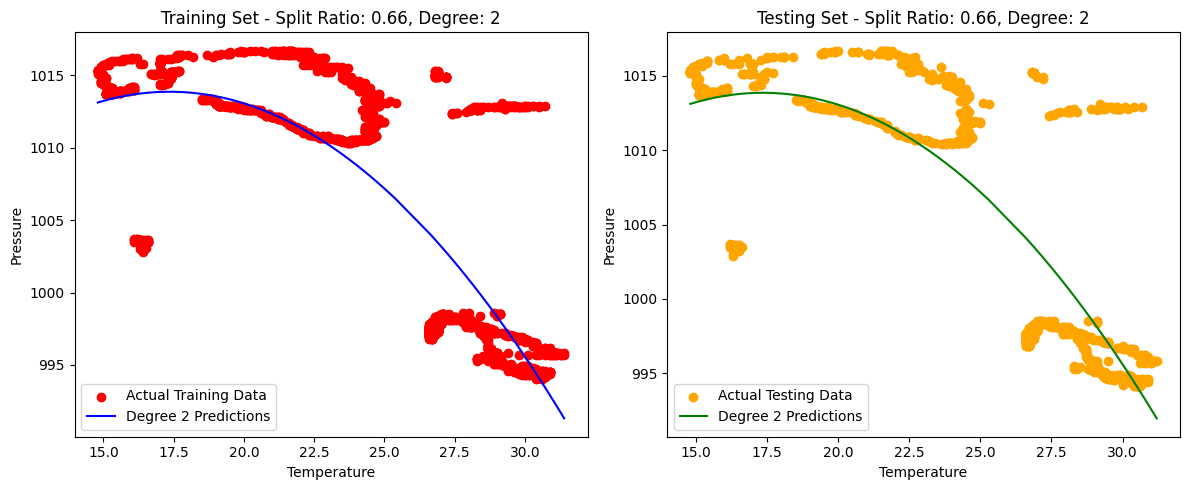

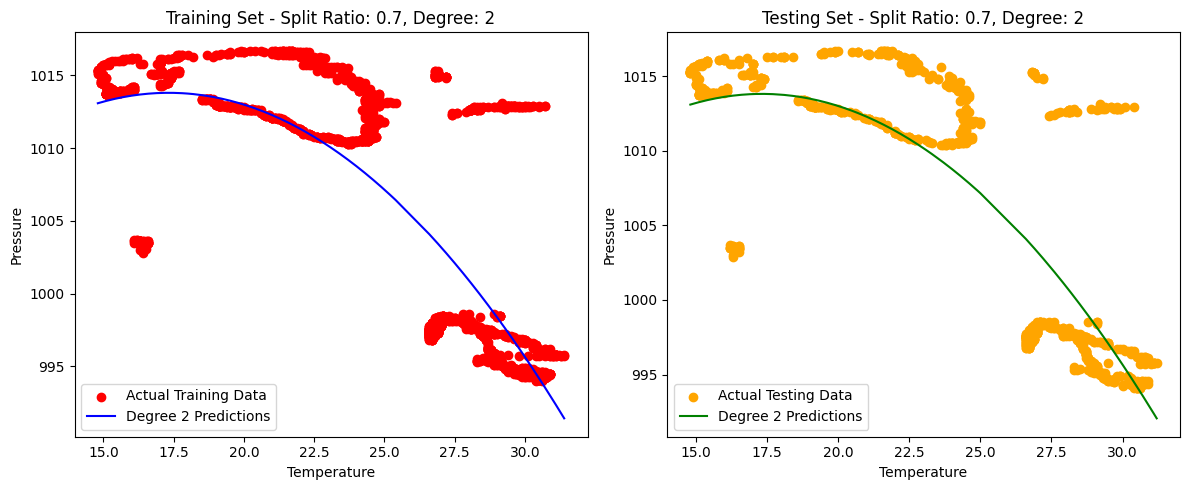

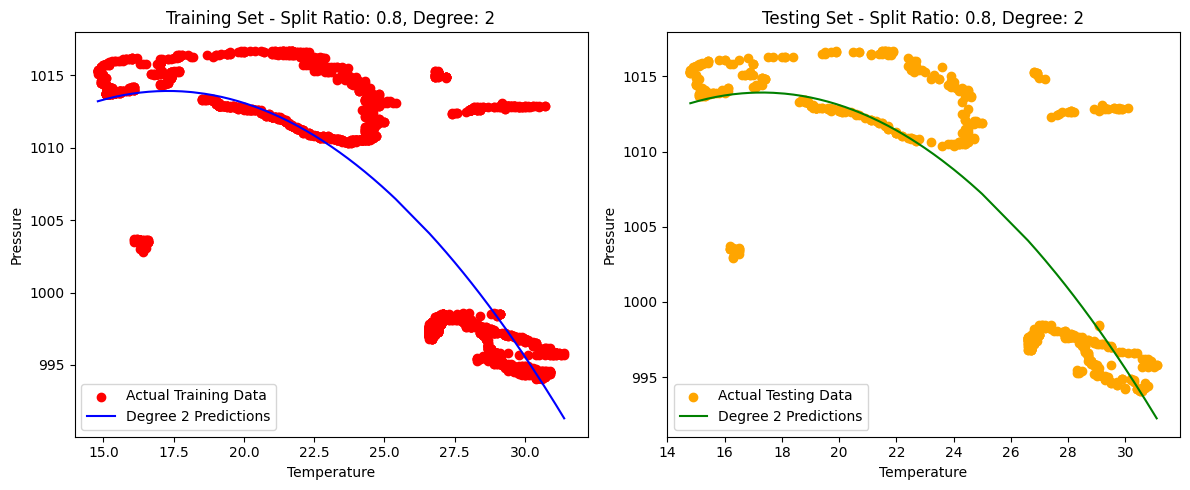

Degree: 3


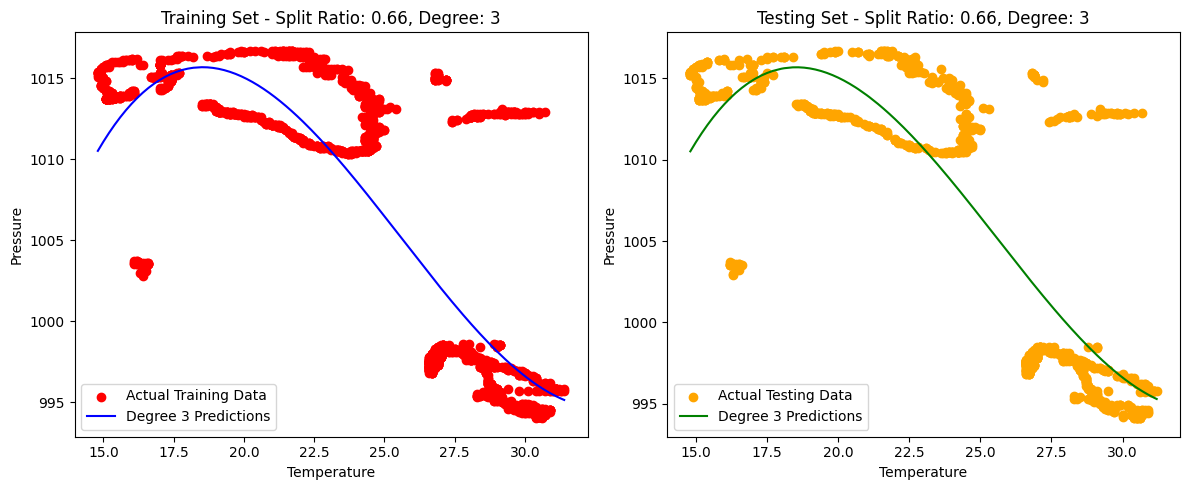

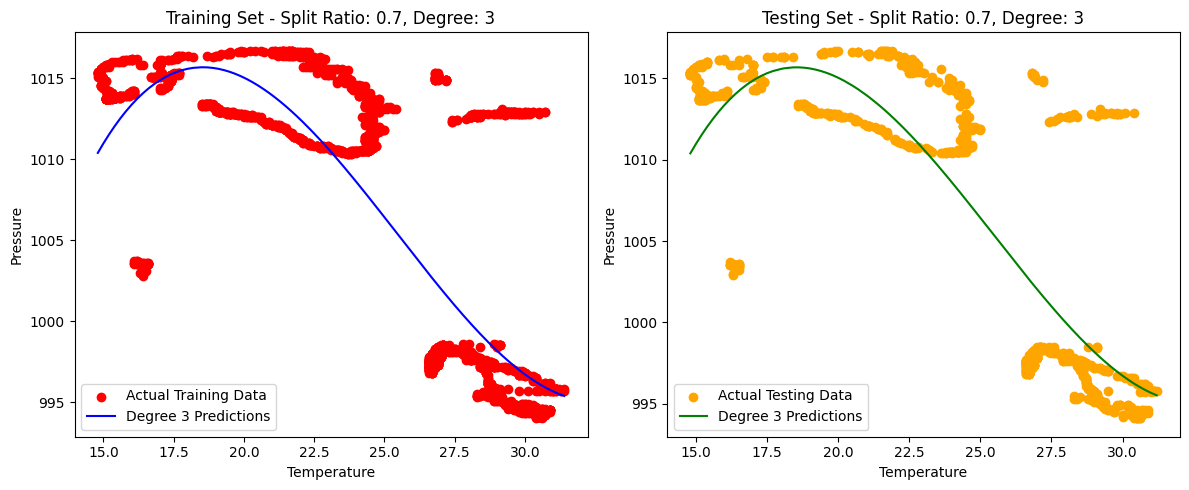

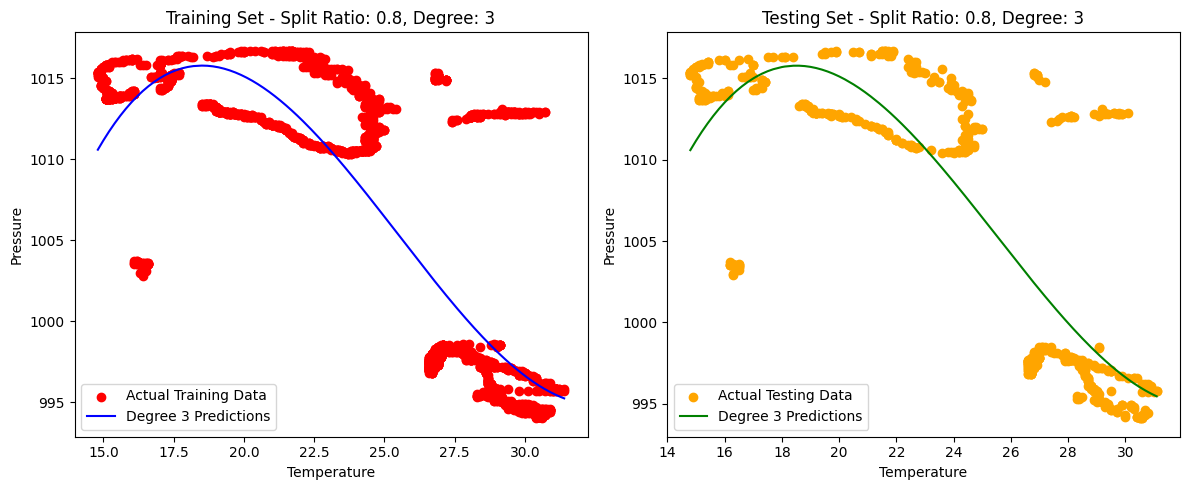

Degree: 4


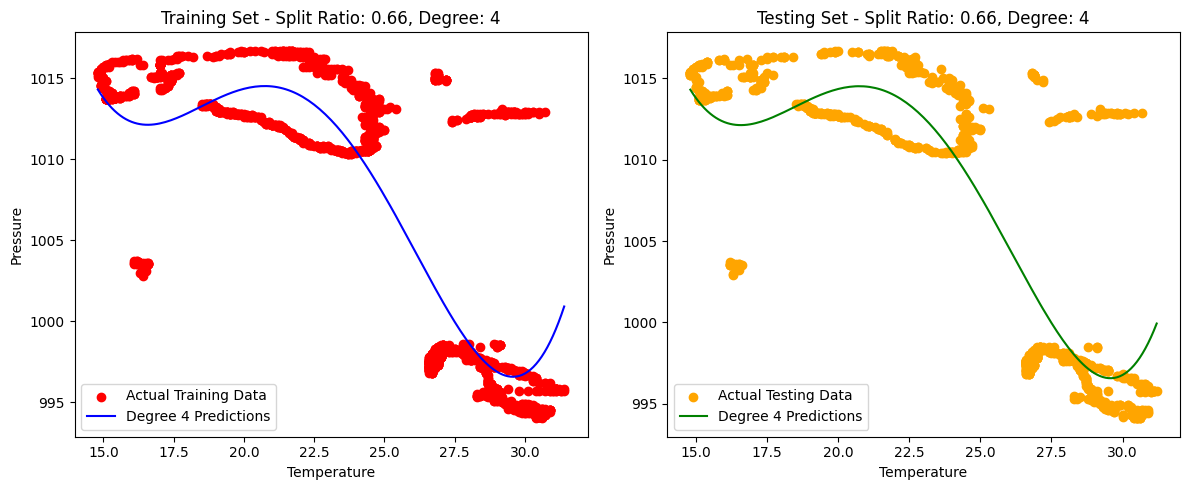

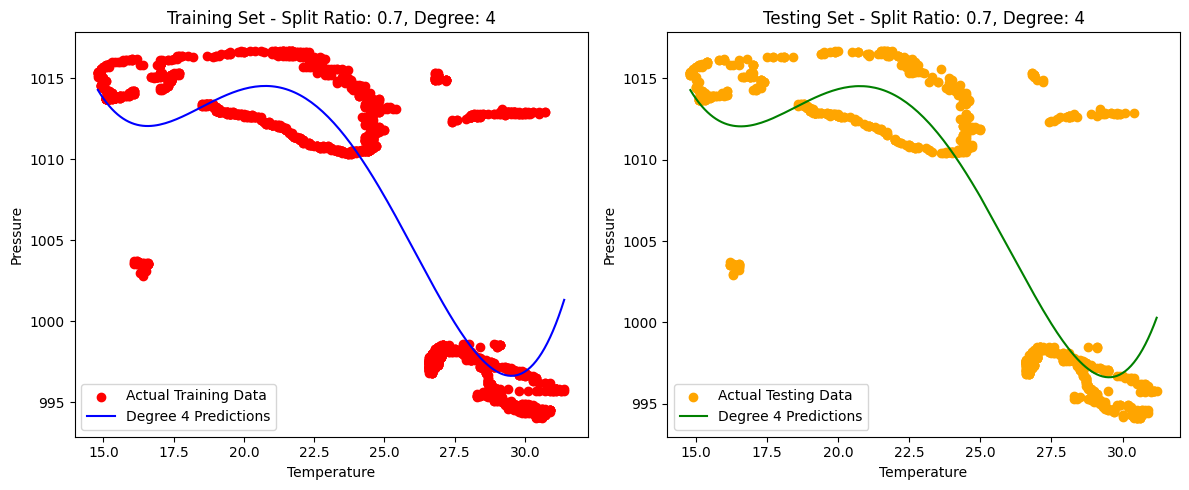

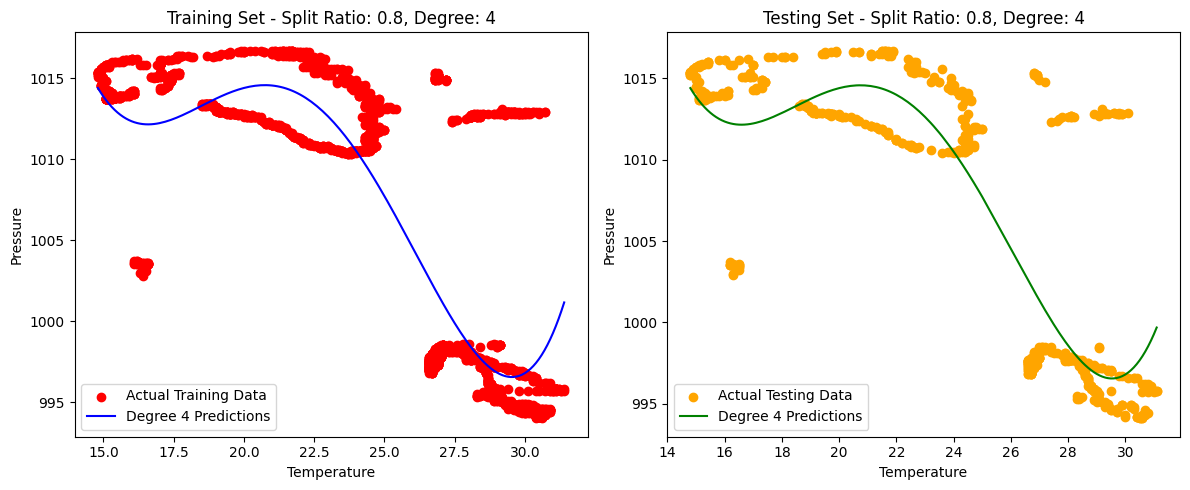

Degree: 5


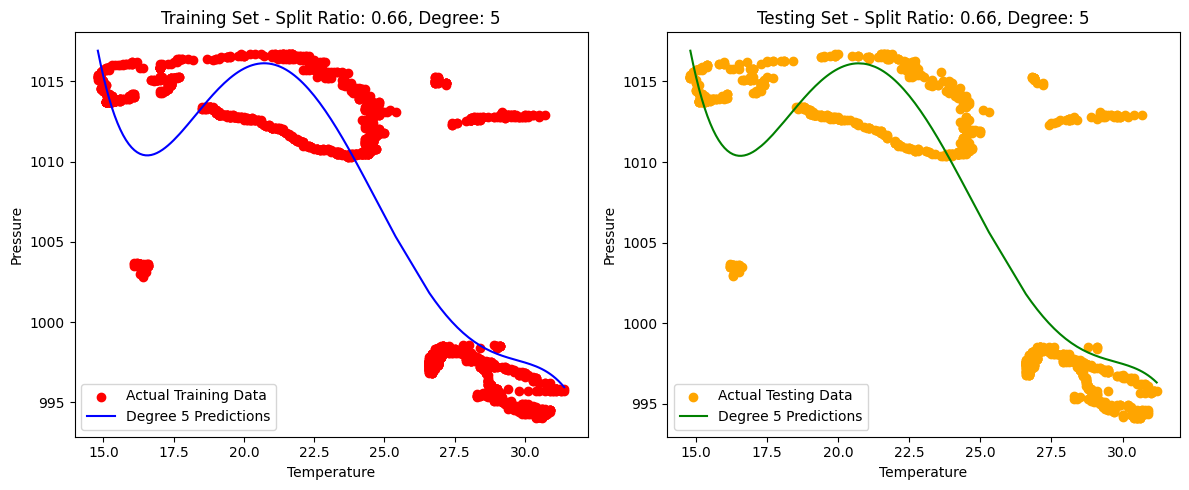

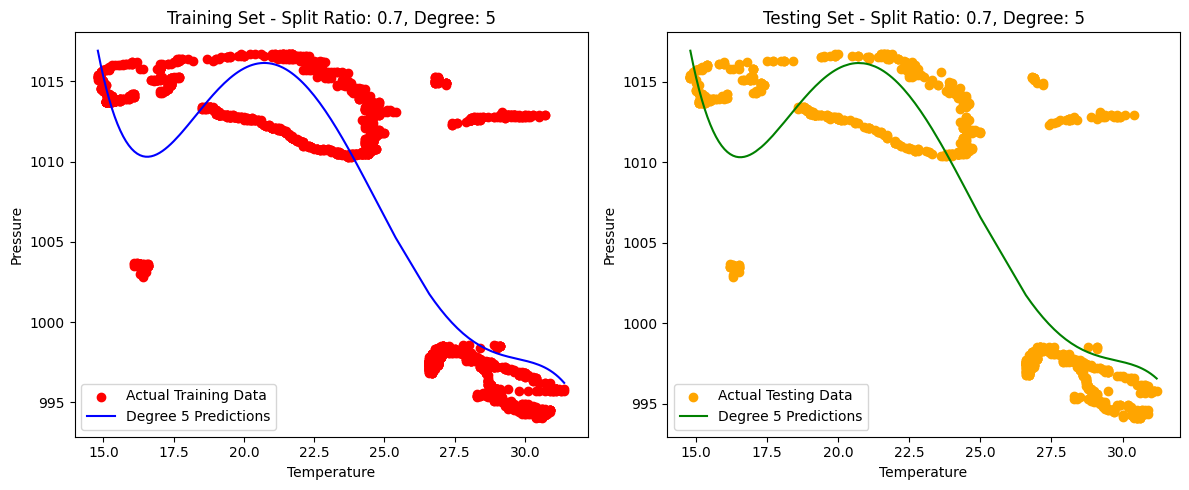

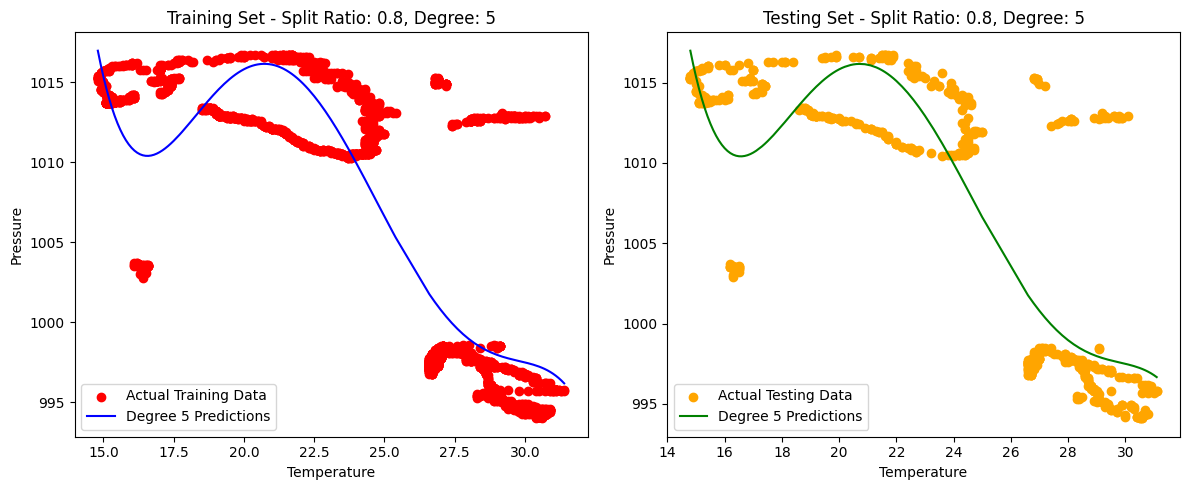

Degree: 6


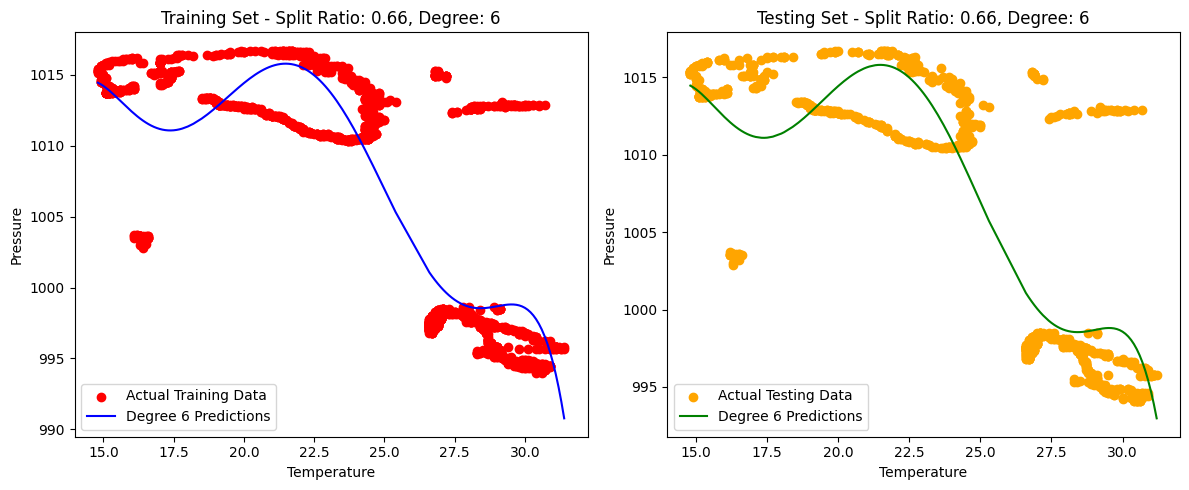

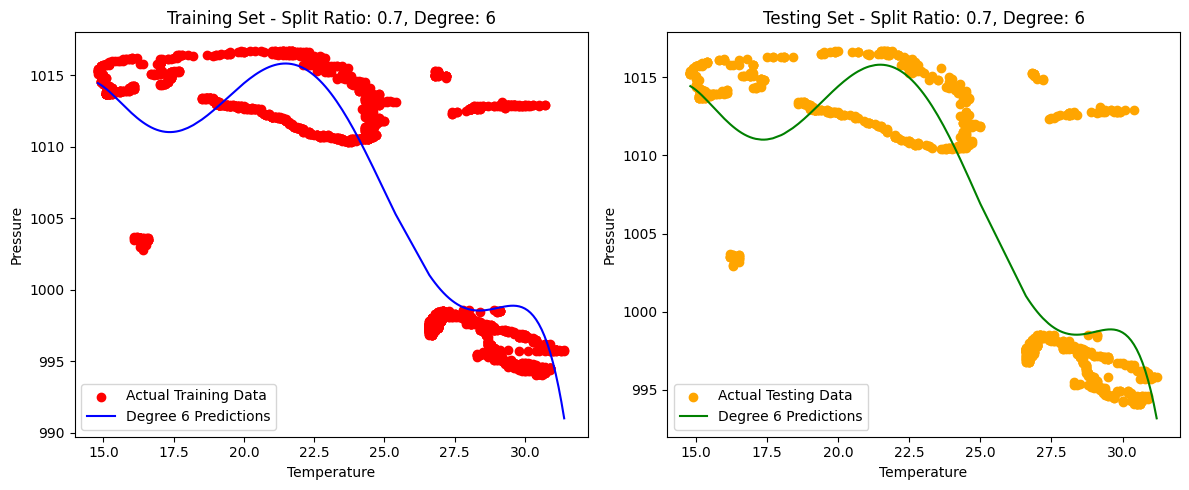

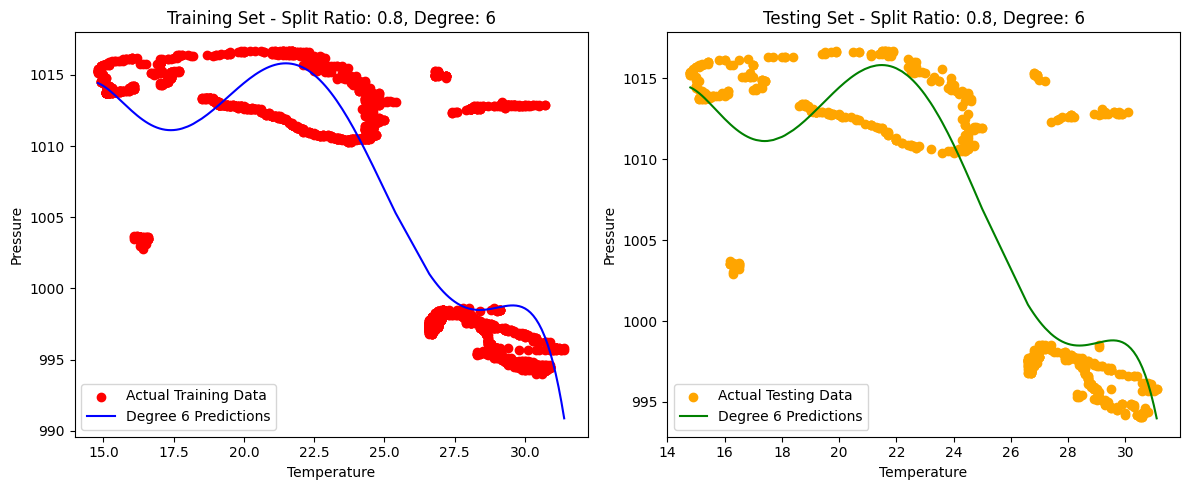

In [18]:
X = df[['Temperature']]
Y = df['Pressure']

# Specify polynomial degrees
degrees = [1, 2, 3, 4, 5, 6]

# Loop over degrees
for degree in degrees:
    print(f"Degree: {degree}")

    # Loop over split ratios
    for split_ratio in [0.66, 0.7, 0.8]:
        # Splitting the data
        df_train, df_test = train_test_split(df, test_size=1 - split_ratio, random_state=42)

        # Creating polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        X_train_poly = poly_features.fit_transform(df_train[['Temperature']])
        X_test_poly = poly_features.transform(df_test[['Temperature']])

        # Fitting a polynomial regression model
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, df_train['Pressure'])

        # Making predictions
        y_train_pred = poly_model.predict(X_train_poly)
        y_test_pred = poly_model.predict(X_test_poly)

        # Sort the data points for better visualization
        sort_order_train = np.argsort(df_train['Temperature'])
        sort_order_test = np.argsort(df_test['Temperature'])

        # Plotting
        plt.figure(figsize=(12, 5))

        # Training set plot
        plt.subplot(1, 2, 1)
        plt.scatter(df_train['Temperature'].iloc[sort_order_train], df_train['Pressure'].iloc[sort_order_train], color='red', label='Actual Training Data')
        plt.plot(df_train['Temperature'].iloc[sort_order_train], y_train_pred[sort_order_train], color='blue', label=f'Degree {degree} Predictions')
        plt.title(f'Training Set - Split Ratio: {split_ratio}, Degree: {degree}')
        plt.xlabel('Temperature')
        plt.ylabel('Pressure')
        plt.legend()

        # Testing set plot
        plt.subplot(1, 2, 2)
        plt.scatter(df_test['Temperature'].iloc[sort_order_test], df_test['Pressure'].iloc[sort_order_test], color='orange', label='Actual Testing Data')
        plt.plot(df_test['Temperature'].iloc[sort_order_test], y_test_pred[sort_order_test], color='green', label=f'Degree {degree} Predictions')
        plt.title(f'Testing Set - Split Ratio: {split_ratio}, Degree: {degree}')
        plt.xlabel('Temperature')
        plt.ylabel('Pressure')
        plt.legend()

        plt.tight_layout()
        plt.show()


The code visually assesses polynomial regression models of different degrees, revealing how higher degrees can lead to overfitting, while lower degrees may result in underfitting.
